In [3]:
#-->IMPORTING LIBRARIES USEFUL FOR DATA ANALYSIS AND MANIPULATION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder


In [4]:
#--> READING THE FILES OF 200 PATIENTS WITH THEIR AGE,SEX,BP,CHOLESTROL,Na_to_k ratio and the drug they are taking

#--> This dataset contains information about drug classification based on patient general information and its diagnosis.
#-->Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.

df_drug = pd.read_csv("drug200.csv")
df_drug.shape



(200, 6)

In [5]:
df_drug

# reading first 5 rows of dataset
#-->Age: Age of the patient
#->Sex: Gender of the patients
#->BP: Blood Pressure of the patient
#->Cholesterol: Cholesterol of the patient
#->Na_to_K: Sodium to Potassium ratio in patient's blood
#->Drug: Drug type give to patients


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
df_drug.Age

0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64

In [7]:

#Data preprocessing is a crucial step in preparing the data for machine learning. 
#The specific techniques used depend on the characteristics of the dataset and the requirements
#of the machine learning model. 
#Here are some common steps and techniques for preprocessing drug data:

#1)DATA CLEANING
#Identify and handle missing values in the dataset. Depending on the extent of missing data, 
#you might choose to impute missing values or remove instances with missing values.
#Check for duplicate entries and remove them to avoid bias in the model.
df_drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df_drug.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
#-->Information about the DataFrame's structure,
#-->including the number of non-null entries in each column, data types, and memory usage

#--> Data type and checking null in dataset.
print(df_drug.info())

#-->Age,Na_to_K are numerical columns.
#-->Sex,BP,Cholesterol,Drug are categorical columns.

 #-->From the results,there are no missing/null value in this dataset

#Data Set Description 

#--> There are 6 variables in this data set:

#-->4 categorical variables[SEX,BP,CHOLESTROL,DRUG]and
#-->2 continuous variables[AGE,NA_TO_K RATIO]

#-->In statistics and data analysis, variables are typically classified into two main types:
#-->   categorical variables and continuous variables. 
#-->    These classifications are important for understanding the nature of the data and determining
#-->appropriate statistical methods and visualization techniques.


#-->Categorical Variables:

#-->Definition: Categorical variables represent data that can be divided into distinct categories or groups.
#-->    These categories are often labels or names that don't have a natural order or numerical value associated with them.
#->Examples:

#-->Nominal: Categorical variables with no inherent order or ranking. 
#-->Examples include colors (red, blue, green), gender (male, female), or types of fruits (apple, banana, orange).



#-->Continuous Variables:

#-->Definition: Continuous variables represent data that can take on an infinite number of values within a given range.
#-->    These variables are typically measured and can have fractional or decimal values.
#-->Examples:
#-->Interval: Continuous variables where the difference between any two values is meaningful, but there is no true zero point.
#-->    Examples include temperature (measured in Celsius or Fahrenheit), IQ scores, or calendar years


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


Original Skewness: 0.3117530585022963
Transformed Skewness: 0.08175586832080094


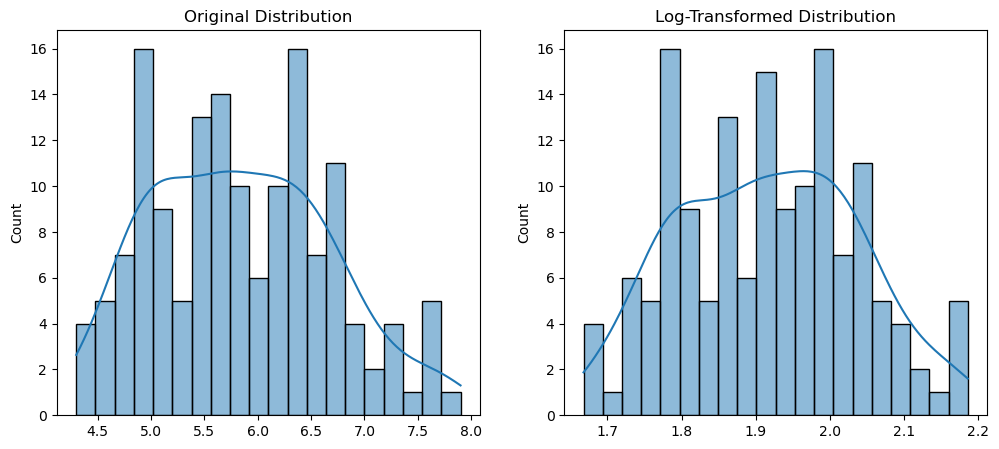

In [12]:

#LOG-BASED TRANSFORMATION


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.datasets import load_iris
data=df_drug.Na_to_K
# Load dataset (example with Iris dataset)
iris = load_iris()
data = iris.data[:, 0]  # Extracting sepal length for demonstration

# Check the skewness before log transformation
original_skewness = skew(data)
print(f"Original Skewness: {original_skewness}")

# Apply log transformation
log_transformed_data = np.log1p(data)  # Using np.log1p to handle zero values

# Check the skewness after log transformation
transformed_skewness = skew(log_transformed_data)
print(f"Transformed Skewness: {transformed_skewness}")

# Visualize the original and transformed distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data, bins=20, kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, bins=20, kde=True)
plt.title('Log-Transformed Distribution')

plt.show()


In [13]:
#UNIVARIATE ANALYSIS

# Categorical Variable-->Sex

#Exploratory data Analysis(EDA)

df_drug.Sex.value_counts()




M    104
F     96
Name: Sex, dtype: int64

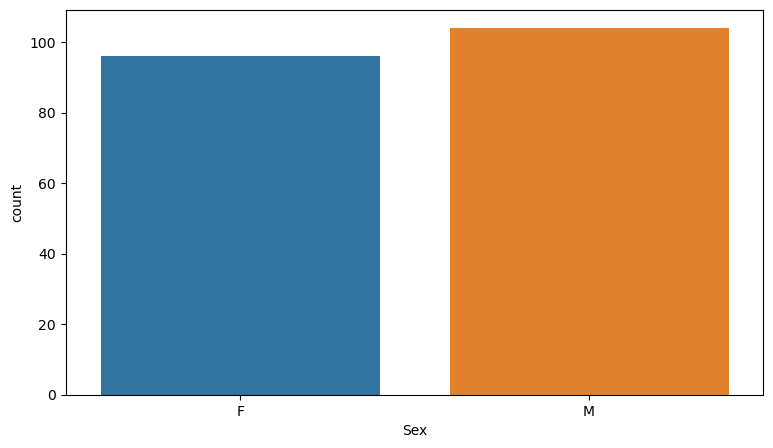

In [14]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = df_drug.Sex)
plt.show()

#-> The distribution of patient gender is balanced.

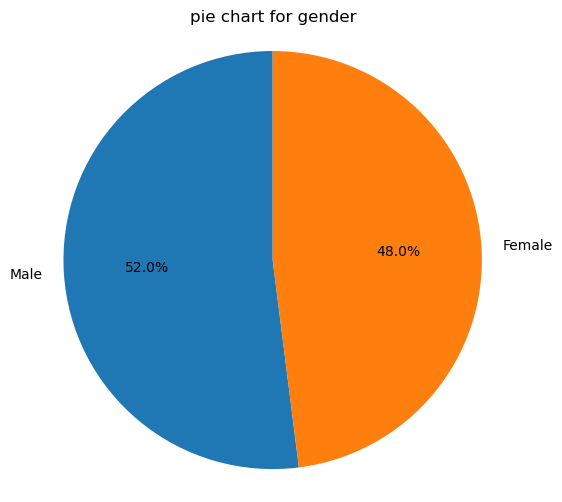

In [15]:

import matplotlib.pyplot as plt

# Sample data
labels = ['Male', 'Female']
sizes = [104,96]  # Sizes or proportions for each category

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size

# Create the pie chart with percentage labels
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Set a title for the chart
plt.title('pie chart for gender')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [16]:
# Categorical Variable--> BP

df_drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

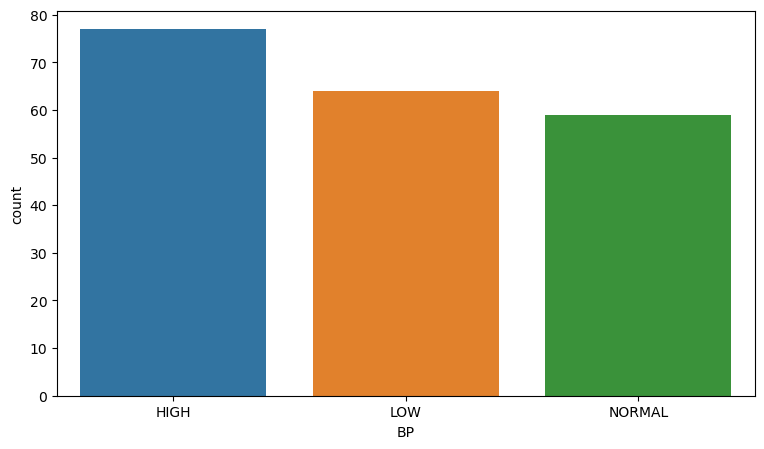

In [17]:
# Blood Pressure Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = df_drug.BP)
plt.show()

#-> The distribution of blood pressure level is balanced.

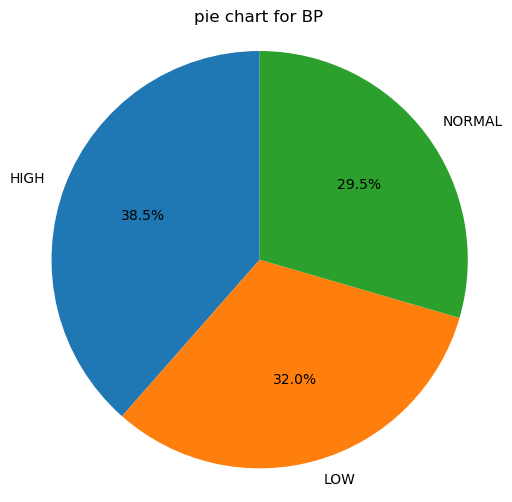

In [18]:

import matplotlib.pyplot as plt

# Sample data
labels = ['HIGH','LOW','NORMAL' ]
sizes = [77,64,59]  # Sizes or proportions for each category

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size

# Create the pie chart with percentage labels
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Set a title for the chart
plt.title('pie chart for BP')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [19]:
# Categorical Variable--> Cholestrol

df_drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

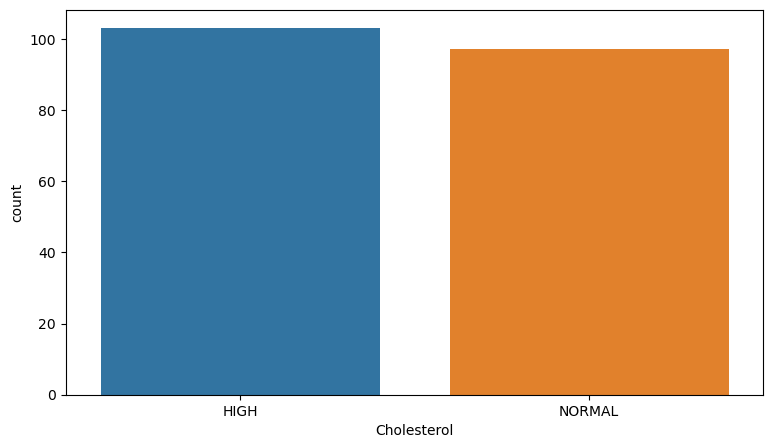

In [20]:
#Cholestrol Distribution

plt.figure(figsize = (9,5))
sns.countplot(x=df_drug.Cholesterol)
plt.show()

#--> The distribution of cholesterol level is balanced.

In [21]:
df_drug.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

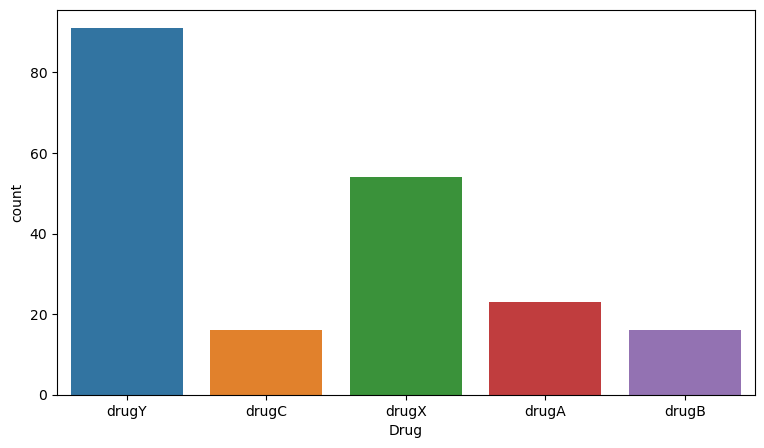

In [22]:
#Drug Distribution

plt.figure(figsize = (9,5))
sns.countplot(x=df_drug.Drug)
plt.show()

#-->It can be seen that from results above, DrugY has more amount than other types of drugs

In [23]:
#UNIVARIATE ANALYSIS

#-->Numerical Variables


#-->This section will show mean, count, std, min, max and others using describe function. 
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Figure size 900x500 with 0 Axes>

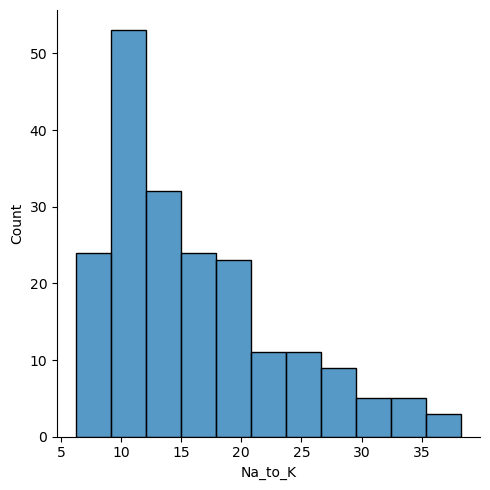

In [24]:
plt.figure(figsize = (9,5))
sns.displot(df_drug.Na_to_K)
plt.show()

<Figure size 900x500 with 0 Axes>

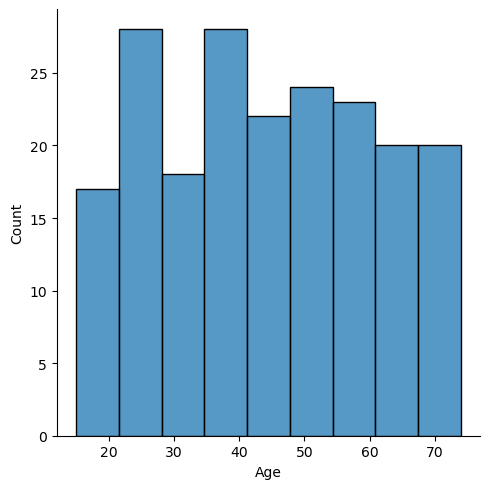

In [25]:
plt.figure(figsize = (9,5))
sns.displot(df_drug.Age)
plt.show()


In [26]:
# BI-VARIATE ANALYSIS OF CATEGORICAL VARIABLES

df_Sex_Drug = df_drug.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug



,Drug,Sex,Count
0,drugA,F,9
1,drugA,M,14
2,drugB,F,6
3,drugB,M,10
4,drugC,F,7
5,drugC,M,9
6,drugX,F,27
7,drugX,M,27
8,drugY,F,47
9,drugY,M,44


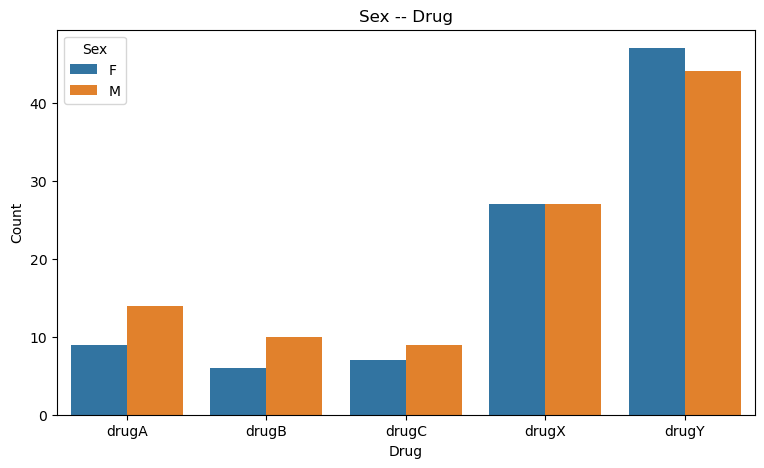

In [27]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

#-->Male people get drugA, drugB and drugC more than male people.
#-->Female people get DrugY more than female people.
#-->drugX seems equal for male and female people.
#-->According to this graph, Sex feature is not an important feature for classification.


In [28]:
df_BP_Drug = df_drug.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,drugA,HIGH,23
1,drugB,HIGH,16
2,drugC,LOW,16
3,drugX,LOW,18
4,drugX,NORMAL,36
5,drugY,HIGH,38
6,drugY,LOW,30
7,drugY,NORMAL,23


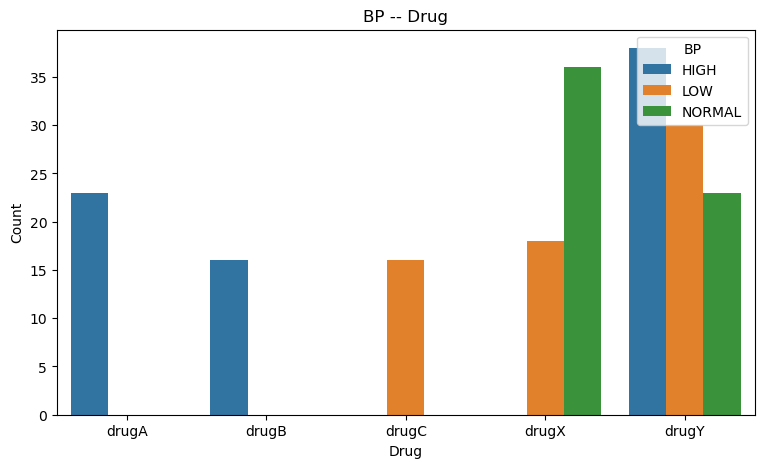

In [29]:
#BP--drug

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()


#-->drugA and drugB are got only by people who have HIGH blood pressure.
#-->drugC is got by people who have LOW blood pressure.
#-->BP is an important feature for classification.

In [30]:
df_CH_Drug = df_drug.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,drugA,HIGH,12
1,drugA,NORMAL,11
2,drugB,HIGH,8
3,drugB,NORMAL,8
4,drugC,HIGH,16
5,drugX,HIGH,20
6,drugX,NORMAL,34
7,drugY,HIGH,47
8,drugY,NORMAL,44


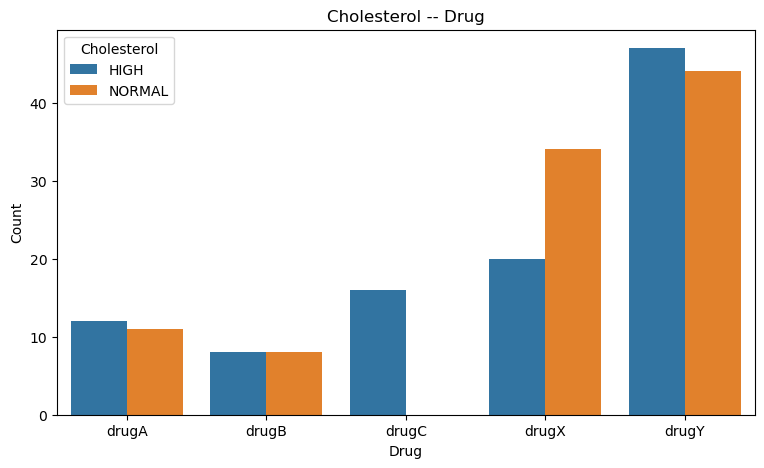

In [31]:
#Cholestrol--Drug
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()


#-->drugC is got by people who have HIGH cholesterol.
#-->Cholesterol is an important feature to classify drugC

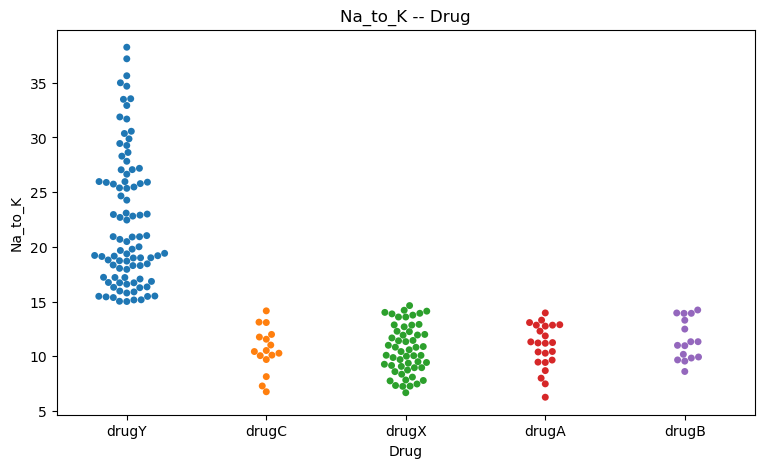

In [32]:
# BI-VARIATE ANALYSIS OF NUMERICAL VARIABLES

#-->Na_to_K -- Drug
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df_drug)
plt.title("Na_to_K -- Drug")
plt.show()



#-->If Na_to_K is bigger than 15, it is always drugY.
#-->Na_to_K -- Drug is an important parameter for classification

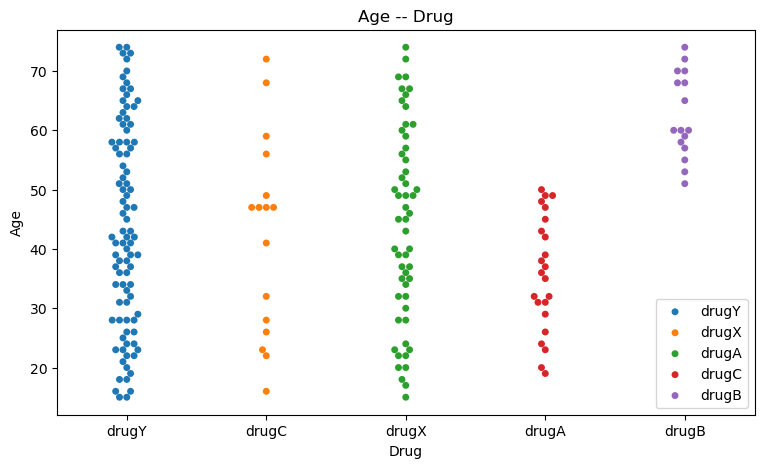

In [33]:
#Age--Drug

plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df_drug)
plt.legend(df_drug.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

#-->Age -- Drug is not important for  classification

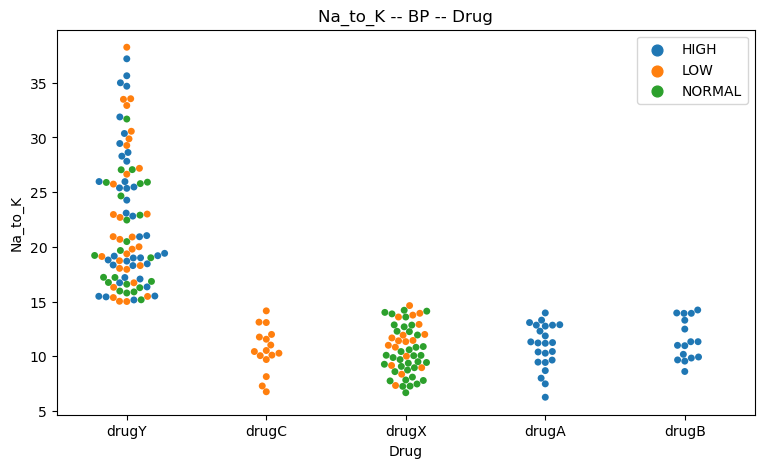

In [34]:
#-->Na_to_K -- BP -- Drug
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df_drug)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

In [35]:

#**Conclusion**

#-->The age of people lies between 15 to 74. Maximum people are of the age of 47.

#-->Maximum males are between the 45-49 age and female are between 35-39 and 55-59 age range.

#-->The number of male patients are higher than female.

#-->Mostly patients have high BP. Mostly patients belong to age group of 45-49 having low BP.

#-->51.5% patients have high Cholesterol.

#-->Mostly patients have the sodium to potassium ratio in between 10-12

#-->5 types of drug taken by patients. Mostly patient are taking DrugY.

#-->drugB and drugA are taken by patients having age more than 50 age and less than 51, respectively.

#-->DrugX are taken by equal numbers of males and females. DrugY mostly taken by females. DrugA, DrugB and drugC are mostly taken by male patients.

#-->If BP is high than they take DrugY, drugA and drugB

#-->DrugY is the common drug, mostly people taking it.

#-->DrugC is taken by the patients who having low BP and drugB and drugA are taken by high BP patients.

#-->The DrugY is taken by the patients whom Na by K ratio is more than 15 and other drugs are taken by those patients, who have Na by K ratio less than 15

#-->Patients Na to K ratio more than 15 are having more chance of High and low BP. Sodium Potassium ratio is responsible for the BP falculations.

In [36]:
# ENCODING CATEGORICAL FEATURES

#Handling Categorical Variables:

#Encode categorical variables using techniques such as one-hot encoding or label encoding.
#Create dummy variables for categorical features to represent them in a format suitable for machine learning algorithms.

categorical_cols=['Sex', 'BP', 'Cholesterol', 'Drug']
num_cols=['Age','Na_to_K']

for col in categorical_cols:
    df_drug[col]=df_drug[col].astype('category').cat.codes

In [37]:
df_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [38]:
#Splitting data into training and testing data
#Data Splitting:

#Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
#Common splits include 70-30, 80-20, or 90-10 ratios.

#-->Data was splitted as 80% training data and 20% testing data.

from sklearn.model_selection import train_test_split

x = df_drug.drop(["Drug"],axis=1)
y = df_drug.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)



In [40]:
x_train



,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0,1,1,10.840
197,52,1,2,0,9.894
38,39,0,2,1,9.709
24,33,0,1,0,33.486
122,34,1,2,0,22.456
...,...,...,...,...,...
106,22,1,2,0,11.953
14,50,0,2,0,12.703
92,29,0,0,0,29.450
179,67,0,2,0,15.891


In [41]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1,1,1,11.424
15,16,0,0,1,15.516
30,18,0,2,1,8.750
158,59,0,1,0,10.444
128,47,1,1,1,33.542
115,51,1,0,0,18.295
69,18,0,0,1,24.276
170,28,0,2,0,12.879
174,42,1,0,1,12.766
45,66,0,2,1,8.107


In [42]:
y_test

array([[3],
       [4],
       [3],
       [2],
       [4],
       [4],
       [4],
       [3],
       [0],
       [3],
       [0],
       [3],
       [4],
       [0],
       [1],
       [4],
       [1],
       [3],
       [2],
       [4],
       [1],
       [3],
       [3],
       [4],
       [4],
       [4],
       [2],
       [3],
       [4],
       [3],
       [4],
       [2],
       [2],
       [4],
       [0],
       [4],
       [3],
       [0],
       [4],
       [0]], dtype=int8)

In [43]:
y_train

array([[3],
       [3],
       [3],
       [4],
       [4],
       [2],
       [4],
       [4],
       [4],
       [3],
       [3],
       [4],
       [3],
       [4],
       [3],
       [4],
       [0],
       [4],
       [4],
       [4],
       [0],
       [4],
       [1],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [1],
       [3],
       [3],
       [3],
       [1],
       [0],
       [3],
       [4],
       [3],
       [0],
       [3],
       [2],
       [4],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [4],
       [0],
       [4],
       [4],
       [0],
       [4],
       [4],
       [4],
       [3],
       [4],
       [3],
       [4],
       [4],
       [3],
       [1],
       [3],
       [4],
       [0],
       [2],
       [4],
       [3],
       [3],
       [4],
       [4],
       [3],
       [3],
       [1],
       [4],
       [1],
       [3],
       [4],
       [4],
       [4],
       [1],
       [2],
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.84375
Precision: 0.7456586343542866
Recall: 0.7339101175302487
F1 Score: 0.7010614548849843


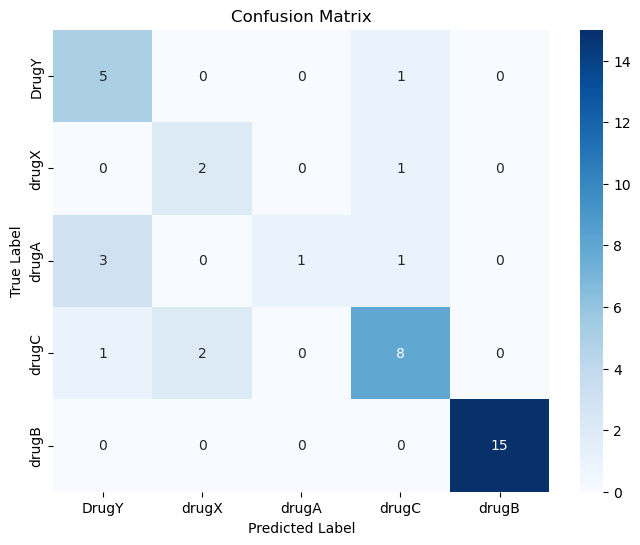

In [45]:
#knn model for training dataset

#MODEL 1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with the desired number of neighbors (e.g., 3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN classifier to the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the training data
y_train_pred = knn_classifier.predict(x_train)  # Use 'knn_classifier', not 'model'

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred,average='macro')
recall = recall_score(y_train, y_train_pred,average='macro')

f1 = f1_score(y_train, y_train_pred,average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

class_labels = ['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
Cross-Validation Scores: [0.95310345 1.         0.95966387 0.93142857 1.        ]
Mean F1 Score: 0.9688391770501303
Standard Deviation of F1 Scores: 0.0271047844044155


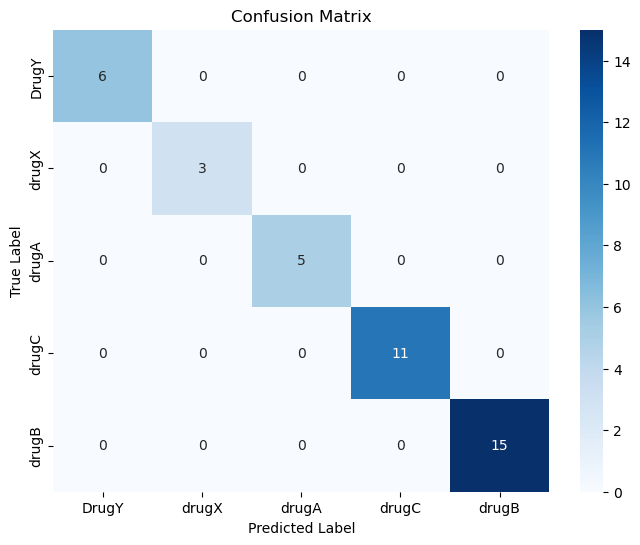

In [55]:
 # Support vector machine(SVM)
    
#2)MODEL 2
    
from sklearn.svm import SVC

from sklearn.metrics import precision_score,recall_score, f1_score,confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")



#Cross-validation score to evaluate performance of a model(To evaluate the performance of a model)
scoring = make_scorer(f1_score, average='macro')
scores = cross_val_score(SVCclassifier, x_train, y_train, cv=5, scoring=scoring)
print("Cross-Validation Scores:", scores)
print("Mean F1 Score:", scores.mean())
print("Standard Deviation of F1 Scores:", scores.std())



class_labels = ['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

C:\Users\anuj jain\AppData\Local\Temp\ipykernel_6232\1971745407.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(x_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was exp

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
Cross-Validation Scores: [1.         0.94823529 0.92280702 0.8529972  0.87777778]
Mean F1 Score: 0.9203634576637671
Standard Deviation of F1 Scores: 0.05191635981346121


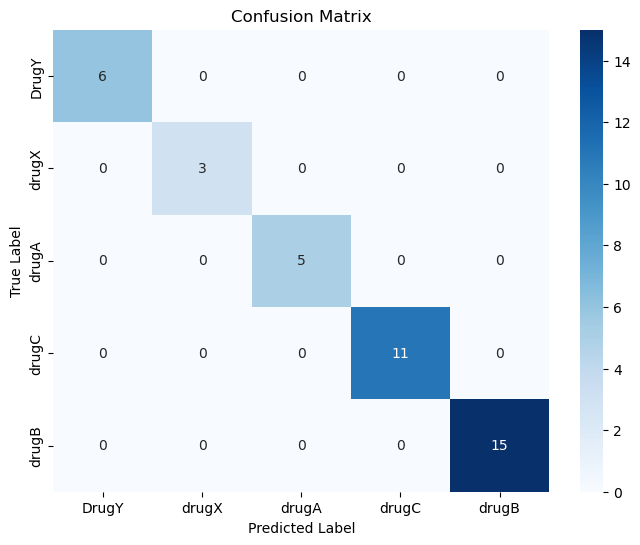

In [49]:
# Random Forest Classifier


#3)MODEL 3


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score, f1_score,confusion_matrix


model_1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model_1.fit(x_train, y_train)

y_pred = model_1.predict(x_test)

print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")

#Cross-validation score to evaluate performance of a model(To evaluate the performance of a model)
scoring = make_scorer(f1_score, average='macro')
scores = cross_val_score(model_1, x_train, y_train, cv=5, scoring=scoring)
print("Cross-Validation Scores:", scores)
print("Mean F1 Score:", scores.mean())
print("Standard Deviation of F1 Scores:", scores.std())



class_labels = ['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()